Pour des rectangles de 1cm, on trace les temps obtenus

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scienceplots

plt.style.use('science')

plt.rcParams.update({
    'font.size': 14,       # Taille de police générale
    'axes.titlesize': 18,  # Taille de la police du titre des axes
    'axes.labelsize': 16,  # Taille de la police des étiquettes des axes
    'xtick.labelsize': 12, # Taille de la police des étiquettes des graduations en x
    'ytick.labelsize': 12, # Taille de la police des étiquettes des graduations en y
    'legend.fontsize': 12, # Taille de la police de la légende
    'figure.titlesize': 20 # Taille de la police du titre de la figure
})

In [2]:
Temperature = np.array([-114,-106,-97,-85.2, -75,-70.2,-61,-54])
Temps = np.array([2*60+5,2*60+10,2*60+38,3*60-3,3*60+35,4*60+19,4*60+34,10*60+25])

In [3]:
Temperature2 = np.array([-114,-106,-97,-85.2, -75,-70.2,-61])
Temps2 = np.array([2*60+5,2*60+10,2*60+38,3*60-3,3*60+35,4*60+19,4*60+34])

Text(0, 0.5, '$t_c$')

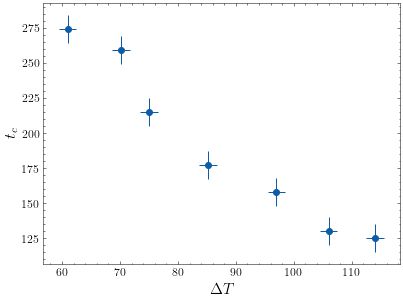

In [4]:
x_error = 1.5* np.ones_like(Temperature2)  # Incertitude sur la température de plus ou moins 1,5 degré
y_error = 10 * np.ones_like(Temps2)  # Incertitude sur le temps de plus ou moins 10 sec

plt.figure(figsize=[6.4,4.8])

plt.errorbar(-Temperature2, Temps2, xerr=x_error, yerr=y_error, fmt='o')

plt.xlabel(r'$\Delta T$')
plt.ylabel(r'$t_c$')

On sait que pour des rectangles identiques : $\Delta T \times t_c$ est une constante.

### Temps estimés par le calcul

In [5]:
D_sans_T = 6.9e-9
h = 1e-2

def t_c(T):
    T = abs(T)
    D = D_sans_T*T
    return h**2/2 * 1/D


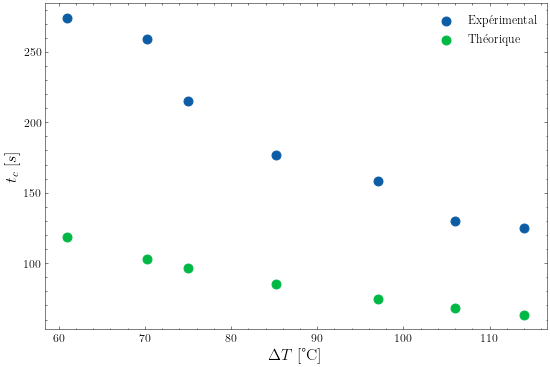

In [6]:
plt.figure(figsize=[9,6])

plt.scatter(-Temperature2, Temps2, s=80, label='Expérimental')
plt.scatter(-Temperature2, t_c(Temperature2), s=80, label='Théorique')
plt.xlabel(r'$\Delta T$ [°C]')
plt.ylabel(r'$t_c$ [$s$]')
plt.legend()

In [7]:
from scipy.optimize import curve_fit

Paramètre a: 16119.200825305017


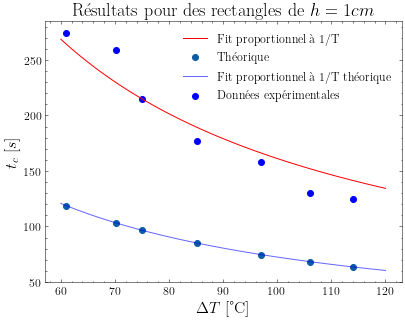

In [8]:
plt.figure(figsize=[6.4,4.8])

def func(x, a):
    return a / x

# Utiliser curve_fit pour ajuster la fonction à vos données
params, params_covariance = curve_fit(func, -Temperature2, Temps2)

params2, params_covariance2 = curve_fit(func, -Temperature2, t_c(Temperature2))

# Prédire les valeurs y
y_pred = func(-Temperature2, *params)


# Afficher les paramètres ajustés
print(f"Paramètre a: {params[0]}")

# Visualiser les résultats

T = np.linspace(60, 120, 100)

plt.scatter(-Temperature2, Temps2, color='blue', label='Données expérimentales')
plt.plot(T, func(T,params[0]), color='red', label='Fit proportionnel à 1/T')

plt.plot(-Temperature2, t_c(Temperature2), 'o', label='Théorique')
plt.plot(T, func(T,params2[0]), color='blue', label='Fit proportionnel à 1/T théorique', alpha=0.6)

plt.xlabel(r'$\Delta T$ [°C]')
plt.ylabel(r'$t_c$ [$s$]')


plt.title('Résultats pour des rectangles de $h = 1cm$')
plt.legend()
plt.show()

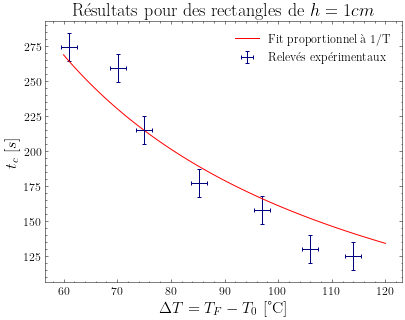

In [9]:
plt.figure(figsize=[6.4,4.8])

x_error = 1.5  # Incertitude sur la température de plus ou moins 1,5 degré
y_error = 10

def func(x, a):
    return a / x

# Utiliser curve_fit pour ajuster la fonction à vos données
params, params_covariance = curve_fit(func, -Temperature2, Temps2)

#params2, params_covariance2 = curve_fit(func, -Temperature2, t_c(Temperature2))

# Prédire les valeurs y
y_pred = func(-Temperature2, *params)


# Afficher les paramètres ajustés
#print(f"Paramètre a: {params[0]}")

# Visualiser les résultats

T = np.linspace(60, 120, 100)

plt.errorbar(-Temperature2, Temps2, xerr=x_error, yerr=y_error, capsize=2, fmt="+", label='Relevés expérimentaux', color='navy')

#plt.scatter(-Temperature2, Temps2, color='blue', label='Données expérimentales')
plt.plot(T, func(T,params[0]), color='red', label='Fit proportionnel à 1/T')

#plt.plot(-Temperature2, t_c(Temperature2), 'o', label='Théorique')
#plt.plot(T, func(T,params2[0]), color='blue', label='Fit proportionnel à 1/T théorique', alpha=0.6)

plt.xlabel(r'$\Delta T=T_F - T_0$ [°C]')
plt.ylabel(r'$t_c$ [$s$]')


plt.title('Résultats pour des rectangles de $h = 1cm$')
plt.legend()

#plt.savefig('RésultatsRectangle.svg')

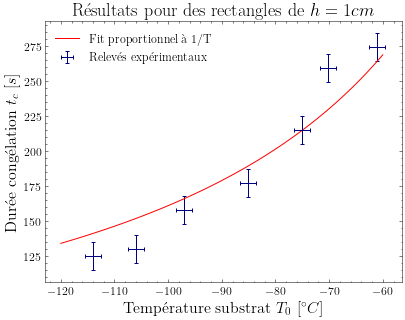

In [10]:
plt.figure(figsize=[6.4,4.8])

x_error = 1.5  # Incertitude sur la température de plus ou moins 1,5 degré
y_error = 10

def func(x, a):
    return a / x

# Utiliser curve_fit pour ajuster la fonction à vos données
params, params_covariance = curve_fit(func, Temperature2, Temps2)

#params2, params_covariance2 = curve_fit(func, -Temperature2, t_c(Temperature2))

# Prédire les valeurs y
y_pred = func(Temperature2, *params)


# Afficher les paramètres ajustés
#print(f"Paramètre a: {params[0]}")

# Visualiser les résultats

T = -np.linspace(60, 120, 100)

plt.errorbar(Temperature2, Temps2, xerr=x_error, yerr=y_error, capsize=2, fmt="+", label='Relevés expérimentaux', color='navy')

#plt.scatter(-Temperature2, Temps2, color='blue', label='Données expérimentales')
plt.plot(T, func(T,params[0]), color='red', label='Fit proportionnel à 1/T')

#plt.plot(-Temperature2, t_c(Temperature2), 'o', label='Théorique')
#plt.plot(T, func(T,params2[0]), color='blue', label='Fit proportionnel à 1/T théorique', alpha=0.6)

plt.xlabel(r'Température substrat $T_0$ [$^\circ C$]')
plt.ylabel(r'Durée congélation $t_c$ [$s$]')


plt.title('Résultats pour des rectangles de $h = 1cm$')
plt.legend()

#plt.savefig('RésultatsRectangle_rev.pdf')

#### Influence de $a_0$ et $T_0$

In [12]:
Temperature_tri20mm = np.array([-79,-94, -71.6, -90.7])
Temps_tri20mm = np.array([60+48,60+34, 120+20, 60+36])

def t_c_tri(T):
    T = abs(T)
    D = D_sans_T * T
    return h**2/(4*D)

Temps_tri15mm = np.array([180-5, 140, 123])
Temperature_tri15mm = np.array([-66.5, -83, -98])

Paramètre a: -16119.200820192043


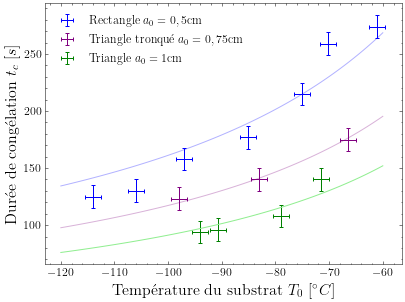

In [19]:
plt.figure(figsize=[6.4,4.8])

def func(x, a):
    return a / x

# Utiliser curve_fit pour ajuster la fonction à vos données
params, params_covariance = curve_fit(func, Temperature2, Temps2)

params2, params_covariance2 = curve_fit(func, Temperature_tri20mm, Temps_tri20mm)

params4, params_covariance4 = curve_fit(func, Temperature_tri15mm, Temps_tri15mm)

# Prédire les valeurs y
y_pred = func(Temperature2, *params)


# Afficher les paramètres ajustés
print(f"Paramètre a: {params[0]}")

# Visualiser les résultats

T = -np.linspace(60, 120, 100)

plt.errorbar(Temperature2, Temps2, xerr=x_error, yerr=y_error, capsize=2, fmt="+", color='blue', label=r'Rectangle $a_0=0,5$cm')

#plt.scatter(-Temperature2, Temps2, color='blue', label=r'Rectangle $a_0=1$cm')
plt.plot(T, func(T,params[0]), color='blue', alpha=0.3)

#plt.plot(-Temperature2, t_c(Temperature2), 'o', label='Rect, Théorique')
#plt.plot(T, func(T,params2[0]), color='blue', label='Fit proportionnel à 1/T théorique', alpha=0.6)

plt.errorbar(Temperature_tri15mm, Temps_tri15mm, xerr=x_error, yerr= y_error, capsize=2, fmt='+', color='purple', label=r'Triangle tronqué $a_0=0,75$cm')
#plt.scatter(-Temperature_tri15mm, Temps_tri15mm, color='purple', label=r'Triangle tronqué $a_0=1,5$cm')
plt.plot(T, func(T,params4[0]), color='purple', alpha=0.3)


#plt.plot(-Temperature_tri, t_c_tri(Temperature_tri), '+', label='Tri, Théorique')

plt.errorbar(Temperature_tri20mm, Temps_tri20mm, xerr=x_error, yerr=y_error, capsize=2, fmt='+', color='green', label=r'Triangle $a_0=1$cm')
#plt.scatter(-Temperature_tri20mm, Temps_tri20mm, color='green', label=r'Triangle $a_0=2$cm')
plt.plot(T, func(T,params2[0]), color='lightgreen')

plt.xlabel(r'Température du substrat $T_0$ [$^\circ C$]')
plt.ylabel(r'Durée de congélation $t_c$ [$s$]')


#plt.title("Rapides relevés sur l'influence de $a_0$")
plt.legend()

plt.savefig("Influence_a0_corr.pdf")

plt.show()